In [10]:
!pip install labelme tensorflow  opencv-python matplotlib albumentations

In [11]:
import os
import time
import uuid
import cv2

In [12]:
IMAGES_PATH = os.path.join('data','images')
number_images = 30

In [21]:
cap = cv2.VideoCapture(1)
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgcodecs\src\loadsave.cpp:787: error: (-215:Assertion failed) !_img.empty() in function 'cv::imwrite'


In [52]:
!labelme

[INFO   ] __init__:get_config:70 - Loading config file from: C:\Users\pc\.labelmerc


In [13]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

In [15]:
images = tf.data.Dataset.list_files('data\\images\\*.bmp')

In [16]:
images.as_numpy_iterator().next()

b'data\\images\\WhatsApp Video 2023-09-06 at 19.15.27_039.bmp'

In [17]:
def load_image(x): 
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_bmp(byte_img)
    return img

In [18]:
images = images.map(load_image)

In [19]:
images.as_numpy_iterator().next()

array([[[2, 2, 2],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[2, 2, 2],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[2, 2, 2],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 2],
        [0, 0, 2],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 2],
        [0, 0, 2],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 2],
        [0, 0, 2],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [20]:
type(images)

tensorflow.python.data.ops.map_op._MapDataset

In [21]:
image_generator = images.batch(4).as_numpy_iterator()

In [22]:
plot_images = image_generator.next()

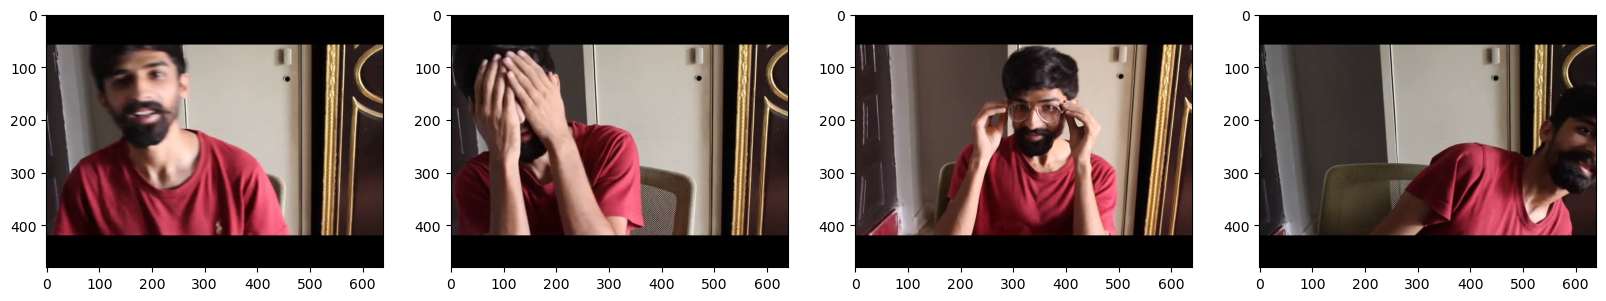

In [23]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image) 
plt.show()

In [24]:
65*0.7


45.5

In [78]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        filename = file

# Split the filename and extension
        name_without_extension, extension = os.path.splitext(filename)

        if extension == ".bmp":
    # Replace ".bmp" with ".json" to create the new filename
            new_filename = name_without_extension + ".json"
            print("Original filename:", filename)
            print("New filename:", new_filename)
        else:
            print("The filename does not have a '.bmp' extension.")
        #filename = file.split('.')[0]+'.json'
        #print(filename)
        existing_filepath = os.path.join('data','labels', new_filename)
        if os.path.exists(existing_filepath): 
            new_filepath = os.path.join('data',folder,'label',new_filename)
            os.replace(existing_filepath, new_filepath)      

Original filename: WhatsApp Video 2023-09-06 at 19.15.27_004.bmp
New filename: WhatsApp Video 2023-09-06 at 19.15.27_004.json
Original filename: WhatsApp Video 2023-09-06 at 19.15.27_005.bmp
New filename: WhatsApp Video 2023-09-06 at 19.15.27_005.json
Original filename: WhatsApp Video 2023-09-06 at 19.15.27_008.bmp
New filename: WhatsApp Video 2023-09-06 at 19.15.27_008.json
Original filename: WhatsApp Video 2023-09-06 at 19.15.27_010.bmp
New filename: WhatsApp Video 2023-09-06 at 19.15.27_010.json
Original filename: WhatsApp Video 2023-09-06 at 19.15.27_012.bmp
New filename: WhatsApp Video 2023-09-06 at 19.15.27_012.json
Original filename: WhatsApp Video 2023-09-06 at 19.15.27_015.bmp
New filename: WhatsApp Video 2023-09-06 at 19.15.27_015.json
Original filename: WhatsApp Video 2023-09-06 at 19.15.27_018.bmp
New filename: WhatsApp Video 2023-09-06 at 19.15.27_018.json
Original filename: WhatsApp Video 2023-09-06 at 19.15.27_022.bmp
New filename: WhatsApp Video 2023-09-06 at 19.15.27_0

In [27]:

import albumentations as alb

In [28]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))

In [29]:
img = cv2.imread(os.path.join('data','train', 'images','WhatsApp Video 2023-09-06 at 19.15.27_015.bmp'))

In [30]:
with open(os.path.join('data', 'train', 'labels', 'WhatsApp Video 2023-09-06 at 19.15.27_015.json'), 'r') as f:
    label = json.load(f)

In [31]:
label['shapes'][0]['points']

[[271.7241379310345, 66.14942528735634],
 [407.3563218390804, 209.25287356321843]]

In [32]:

coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [33]:
coords

[271.7241379310345, 66.14942528735634, 407.3563218390804, 209.25287356321843]

In [34]:

coords = list(np.divide(coords, [640,480,640,480]))

In [35]:
coords

[0.4245689655172414,
 0.13781130268199238,
 0.6364942528735631,
 0.4359434865900384]

In [36]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

In [37]:
augmented['bboxes'][0][2:]

(0.7141251596424008, 0.4494508301404854)

In [38]:
augmented['bboxes']

[(0.41272030651340996,
  0.1314431673052363,
  0.7141251596424008,
  0.4494508301404854)]

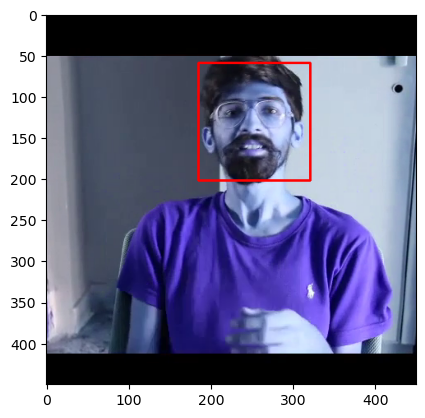

In [39]:
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)), 
                    (255,0,0), 2)

plt.imshow(augmented['image'])

In [80]:
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))
        name_without_extension, extension = os.path.splitext(image)
        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'label', f'{name_without_extension}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

        try: 
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{name_without_extension}.{x}.bmp'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data', partition, 'labels', f'{name_without_extension}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

In [40]:
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.bmp', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [41]:
test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.bmp', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [42]:
val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.bmp', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [43]:
train_images.as_numpy_iterator().next()

array([[[0.        , 0.05882353, 0.        ],
        [0.        , 0.05882353, 0.        ],
        [0.        , 0.05882353, 0.        ],
        ...,
        [0.        , 0.05882353, 0.        ],
        [0.        , 0.05882353, 0.        ],
        [0.        , 0.05882353, 0.        ]],

       [[0.        , 0.05882353, 0.        ],
        [0.        , 0.05882353, 0.        ],
        [0.        , 0.05882353, 0.        ],
        ...,
        [0.        , 0.05882353, 0.        ],
        [0.        , 0.05882353, 0.        ],
        [0.        , 0.05882353, 0.        ]],

       [[0.        , 0.05882353, 0.        ],
        [0.        , 0.05882353, 0.        ],
        [0.        , 0.05882353, 0.        ],
        ...,
        [0.        , 0.05882353, 0.        ],
        [0.        , 0.05882353, 0.        ],
        [0.        , 0.05882353, 0.        ]],

       ...,

       [[0.        , 0.05882353, 0.        ],
        [0.        , 0.05882353, 0.        ],
        [0.        , 0

In [44]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

In [45]:

train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [46]:
test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [47]:
val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [48]:
train_labels.as_numpy_iterator().next()

(array([0], dtype=uint8), array([0., 0., 0., 0.], dtype=float16))

In [49]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(2700, 2700, 540, 540, 660, 660)

In [50]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(3000)
train = train.batch(8)
train = train.prefetch(4)

In [51]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(800)
test = test.batch(8)
test = test.prefetch(4)

In [52]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [53]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.2583 , 0.07104, 0.9033 , 0.6865 ],
        [0.5776 , 0.5386 , 0.8916 , 0.869  ],
        [0.5317 , 0.1387 , 1.     , 0.655  ],
        [0.     , 0.506  , 0.3552 , 0.902  ],
        [0.2089 , 0.11005, 0.5293 , 0.505  ],
        [0.455  , 0.07837, 0.883  , 0.4973 ],
        [0.5503 , 0.6787 , 0.964  , 0.8857 ],
        [0.3608 , 0.1317 , 0.721  , 0.5044 ]], dtype=float16))

In [54]:
data_samples = train.as_numpy_iterator()

In [55]:
res = data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


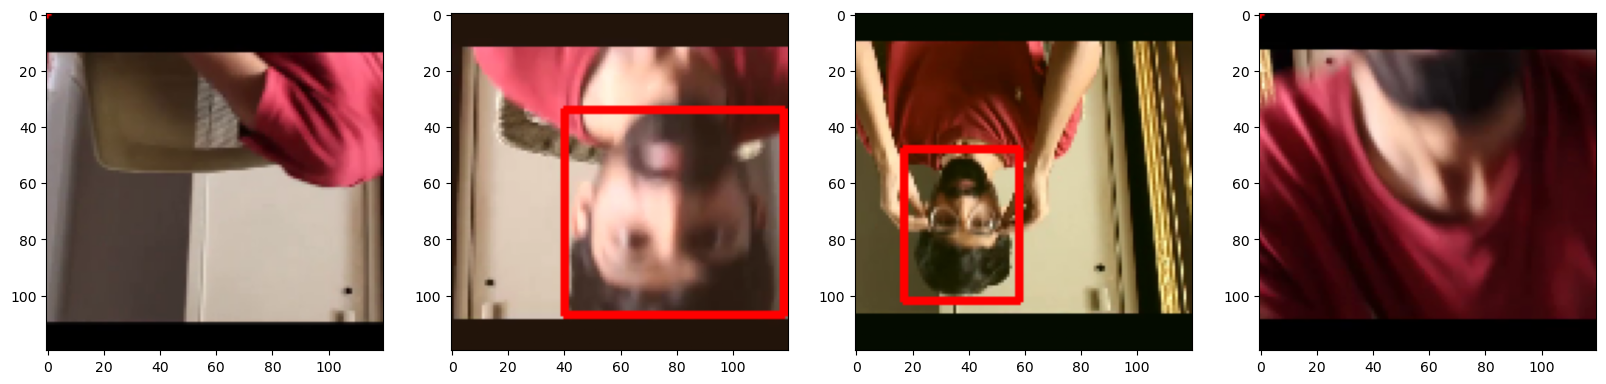

In [56]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_image, 
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)

In [57]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [58]:
vgg = VGG16(include_top=False)

In [59]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [60]:
def build_model(): 
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

In [65]:

facetracker = build_model()

In [66]:
facetracker.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 120, 120, 3)]        0         []                            
                                                                                                  
 vgg16 (Functional)          (None, None, None, 512)      1471468   ['input_6[0][0]']             
                                                          8                                       
                                                                                                  
 global_max_pooling2d_4 (Gl  (None, 512)                  0         ['vgg16[0][0]']               
 obalMaxPooling2D)                                                                                
                                                                                            

In [67]:
X, y = train.as_numpy_iterator().next()

In [68]:
X.shape

(8, 120, 120, 3)

In [69]:
classes, coords = facetracker.predict(X)

1/1 [==============================] - 1s 1s/step


In [70]:
classes, coords

(array([[0.4256085 ],
        [0.33972675],
        [0.34263846],
        [0.49138716],
        [0.48145294],
        [0.4103136 ],
        [0.38352254],
        [0.43762076]], dtype=float32),
 array([[0.54239225, 0.52588034, 0.4310702 , 0.5017332 ],
        [0.5674992 , 0.5291164 , 0.3321287 , 0.4609742 ],
        [0.5554697 , 0.5358845 , 0.34923005, 0.51876616],
        [0.53694487, 0.62056404, 0.44716653, 0.5379971 ],
        [0.5290046 , 0.676804  , 0.38995877, 0.5462274 ],
        [0.5575256 , 0.508631  , 0.4419924 , 0.5395195 ],
        [0.5937634 , 0.47798005, 0.33496538, 0.4933082 ],
        [0.56361955, 0.5487168 , 0.5110137 , 0.47440085]], dtype=float32))

In [71]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [72]:
opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001, decay=lr_decay)

In [73]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [74]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [75]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=6.866251>

In [76]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.89024866>

In [77]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=6.866251>

In [78]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [79]:
model = FaceTracker(facetracker)

In [80]:
model.compile(opt, classloss, regressloss)

In [81]:
logdir='logs'

In [82]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
early_stop = tf.keras.callbacks.EarlyStopping(patience=2)

In [83]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback,early_stop])

Epoch 1/10
 18/338 [>.............................] - ETA: 15:18 - total_loss: 1.7567 - class_loss: 0.3510 - regress_loss: 1.5812

KeyboardInterrupt: 

NameError: name 'hist' is not defined

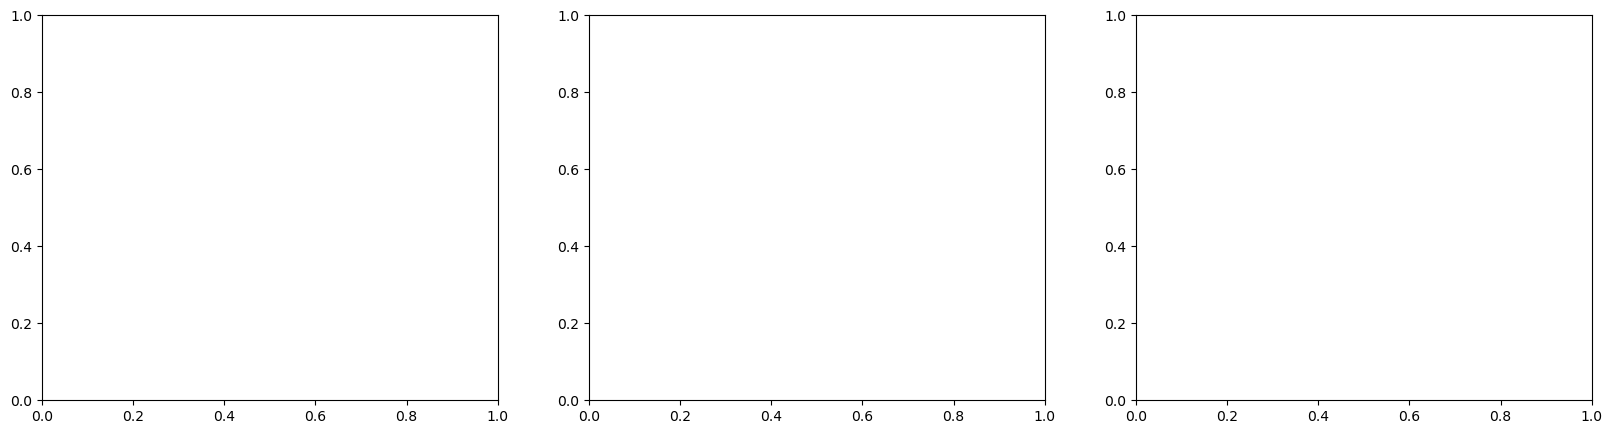

In [64]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

In [93]:
test_data = test.as_numpy_iterator()

In [94]:
test_sample = test_data.next()

In [95]:
yhat = facetracker.predict(test_sample[0])

1/1 [==============================] - 1s 744ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


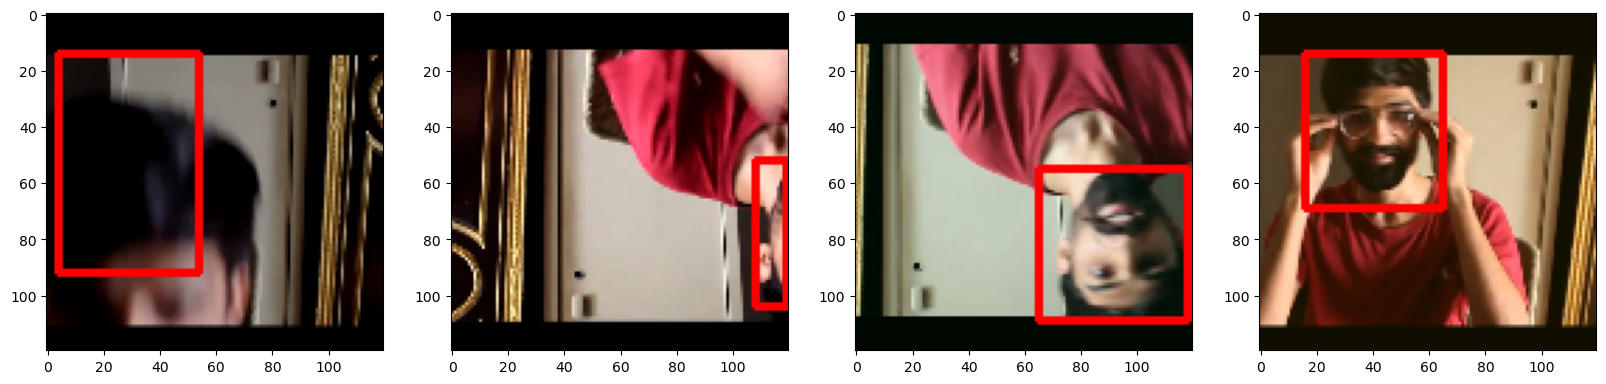

In [96]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

In [90]:
from tensorflow.keras.models import load_model

In [7]:
facetracker.save('facetracker.h5')

NameError: name 'facetracker' is not defined

1/1 [==============================] - 1s 986ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


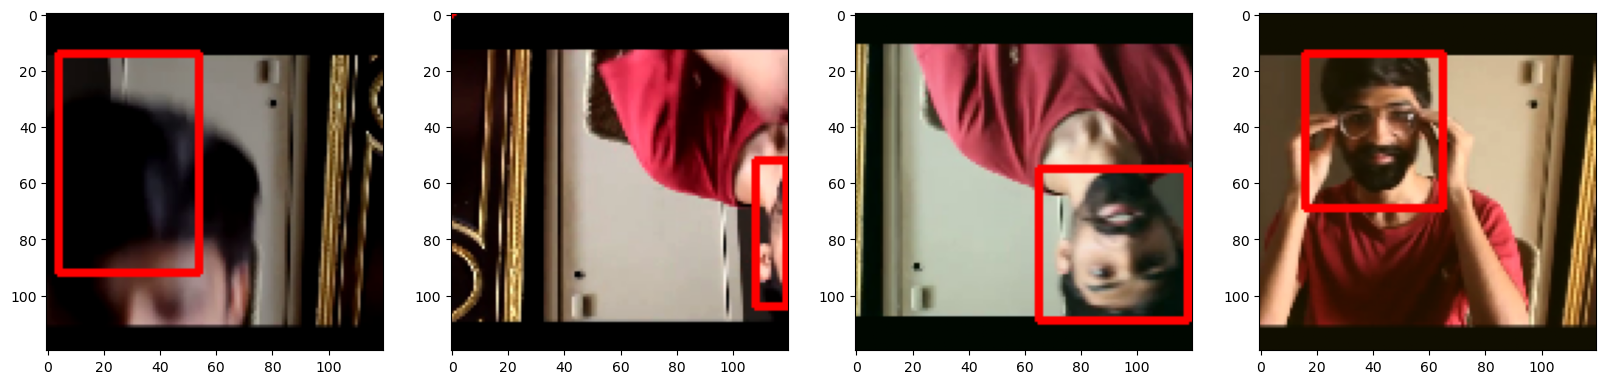

In [97]:
facetracker = load_model('facetracker.h5')
yhat = facetracker.predict(test_sample[0])
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

In [98]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('EyeTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

TypeError: 'NoneType' object is not subscriptable

In [99]:
import cv2

cap = cv2.VideoCapture(0)

# Check if the camera opened successfully
if not cap.isOpened():
    print("Error: Unable to open the camera.")
    exit()

while True:
    ret, frame = cap.read()
    
    # Check if the frame was read successfully
    if not ret:
        print("Error: Failed to read frame from the camera.")
        break

    # Rest of your code for processing and displaying frames

    cv2.imshow('EyeTrack', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break



Error: Failed to read frame from the camera.
